# Imports

In [200]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as pl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, precision_score, recall_score, accuracy_score, classification_report
import math

In [119]:
# from google.colab import drive
# drive.mount('/content/drive')

In [120]:
df_21 = pd.read_csv('players_21.csv')
df_22 = pd.read_csv('players_22.csv')

C:\Users\ayush\AppData\Local\Temp\ipykernel_22844\1178917311.py:2: DtypeWarning:

Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.



# Feature Engineering (Adding Target Variable)

In [121]:
s1 = df_21['sofifa_id']
s2 = df_22['sofifa_id']
sf_id = s1[s1.isin(s2)]
print(sf_id)


0        158023
1         20801
2        188545
3        190871
4        192985
          ...  
18928    243790
18930    250989
18937    257689
18941    257936
18942    258736
Name: sofifa_id, Length: 13300, dtype: int64


In [122]:
id_21=[]
for i in df_21.index:
  if df_21['sofifa_id'][i] not in list(sf_id):
    id_21.append(i)

id_22=[]
for i in df_22.index:
  if df_22['sofifa_id'][i] not in list(sf_id):
    id_22.append(i)

In [123]:
df_21.drop(id_21, axis=0, inplace=True)

In [124]:
df_22.drop(id_22,axis=0, inplace=True)

In [125]:
df_22.sort_values(by='sofifa_id', inplace=True)
df_21.sort_values(by='sofifa_id', inplace=True)
ind_21 = df_21.index
ind_22 = df_22.index

In [126]:
ind_22

Int64Index([  509,   388,  1136, 16505,  3827, 13371, 12244,  5465,  3828,
            11056,
            ...
            15704, 14955, 12091, 14956,  3821, 16293,  6374, 17264, 12092,
             7429],
           dtype='int64', length=13300)

In [127]:
y =[]
for i in range(len(ind_21)):
  if df_21['wage_eur'][ind_21[i]] < df_22['wage_eur'][ind_22[i]]:
    y.append(1)
  elif df_21['wage_eur'][ind_21[i]] > df_22['wage_eur'][ind_22[i]]:
    y.append(-1)
  else:
    y.append(0)  



In [128]:
print(y.count(0),y.count(1),y.count(-1))

3700 5802 3798


In [129]:
df_21['Wage_Increase'] = y

In [130]:
df_21

sofifa_id                                         player_url  \
272           41  https://sofifa.com/player/41/andres-iniesta-lu...   
212         1179  https://sofifa.com/player/1179/gianluigi-buffo...   
3059        2147  https://sofifa.com/player/2147/maarten-stekele...   
16076       2702  https://sofifa.com/player/2702/kevin-ellison/2...   
3805        3467  https://sofifa.com/player/3467/yuri-de-souza-f...   
...          ...                                                ...   
17805     258947  https://sofifa.com/player/258947/yvan-alounga/...   
12944     258949  https://sofifa.com/player/258949/jofre-carrera...   
17806     258952  https://sofifa.com/player/258952/ibrahim-albar...   
12945     258953  https://sofifa.com/player/258953/ilmari-niskan...   
6339      258958  https://sofifa.com/player/258958/oleksandr-fil...   

            short_name                   long_name player_positions  overall  \
272            Iniesta        Andrés Iniesta Luján          CM, CAM       81   
212          G. Buffon            Gianluigi Buffon               GK       82   
3059   M. Stekelenburg        Maarten Stekelenburg               GK       72   
16076       K. Ellison         Kevin Keith Ellison           LM, ST       58   
3805              Yuri       Yuri de Souza Fonseca               ST       71   
...                ...                         ...              ...      ...   
17805       Y. Alounga  Yvan Gregory Alounga Avebe       ST, LM, RW       55   
12944   Jofre Carreras        Jofre Carreras Pagès           RW, LW       63   
17806      I. Albaraka      Ibrahim Ali Al-Barakah              CDM       55   
12945      I. Niskanen             Ilmari Niskanen               LM       63   
6339       O. Filippov          Oleksandr Filippov               ST       69   

       potential  value_eur  wage_eur  age  ...    cb   rcb    rb    gk  \
272           81  8000000.0   12000.0   36  ...  64+3  64+3  67+3  17+3   
212           82  3400000.0   41000.0   42  ...  29+3  29+3  26+3  80+2   
3059          72   250000.0    6000.0   37  ...  30+2  30+2  26+2  71+1   
16076         58        NaN    2000.0   41  ...  53+2  53+2  48+2  15+2   
3805          71   650000.0    6000.0   37  ...  47+2  47+2  49+2  17+2   
...          ...        ...       ...  ...  ...   ...   ...   ...   ...   
17805         70   300000.0    1000.0   18  ...  33+2  33+2  36+2  16+2   
12944         79  1200000.0    1000.0   19  ...  40+2  40+2  46+2  16+2   
17806         60   170000.0    2000.0   23  ...  52+2  52+2  53+2  15+2   
12945         72  1100000.0    2000.0   22  ...  41+2  41+2  46+2  17+2   
6339          69  1500000.0    8000.0   27  ...  38+2  38+2  42+2  14+2   

                                         player_face_url  \
272    https://cdn.sofifa.net/players/000/041/21_120.png   
212    https://cdn.sofifa.net/players/001/179/21_120.png   
3059   https://cdn.sofifa.net/players/002/147/21_120.png   
16076  https://cdn.sofifa.net/players/002/702/21_120.png   
3805   https://cdn.sofifa.net/players/003/467/21_120.png   
...                                                  ...   
17805  https://cdn.sofifa.net/players/258/947/21_120.png   
12944  https://cdn.sofifa.net/players/258/949/21_120.png   
17806  https://cdn.sofifa.net/players/258/952/21_120.png   
12945  https://cdn.sofifa.net/players/258/953/21_120.png   
6339   https://cdn.sofifa.net/players/258/958/21_120.png   

                                    club_logo_url  \
272    https://cdn.sofifa.net/teams/101146/60.png   
212        https://cdn.sofifa.net/teams/45/60.png   
3059      https://cdn.sofifa.net/teams/245/60.png   
16076  https://cdn.sofifa.net/teams/112254/60.png   
3805     https://cdn.sofifa.net/teams/2023/60.png   
...                                           ...   
17805     https://cdn.sofifa.net/teams/897/60.png   
12944     https://cdn.sofifa.net/teams/452/60.png   
17806  https://cdn.sofifa.net/teams/113217/60.png   
12945  https://cdn.sofifa.net/teams/11123

# Exploratory Data Analysis

In [131]:
fig = pl.violin(df_21, box=True, x="Wage_Increase", y="wage_eur", orientation="v")
fig.update_layout(autosize=False, width=1000, height=800,)
fig.show()

<Figure size 5200x1000 with 0 Axes>

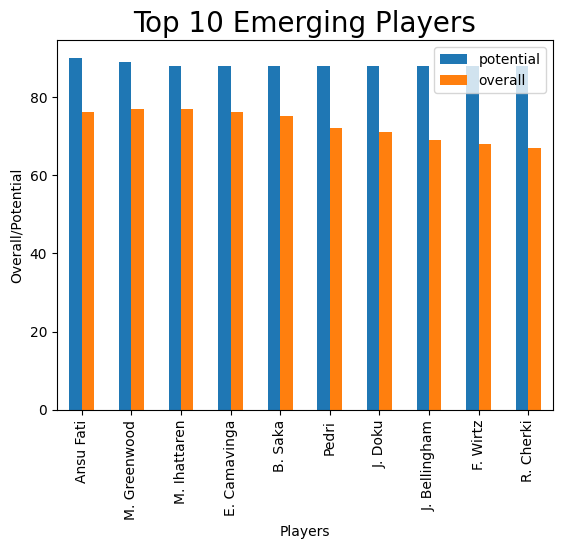

In [132]:
top_10 = df_21[df_21.age<19].sort_values(by=['potential','overall',"age"], ascending=[False,False,True])[['short_name','overall','potential','age','club_name','league_name','nationality_name']]
top_10 = top_10.reset_index()
top_10 = top_10.drop(['index'], axis=1)
top_10.drop(top_10.index[10:], inplace=True)

overall=top_10['overall'].to_list()
potent=top_10['potential'].to_list()

plt.figure(figsize=(26,5),dpi=200)
top_10.plot(x='short_name', y=['potential','overall'], kind='bar', )
plt.xticks(rotation=90)
plt.xlabel('Players')
plt.ylabel('Overall/Potential')
plt.title('Top 10 Emerging Players', fontsize=20)
plt.show()

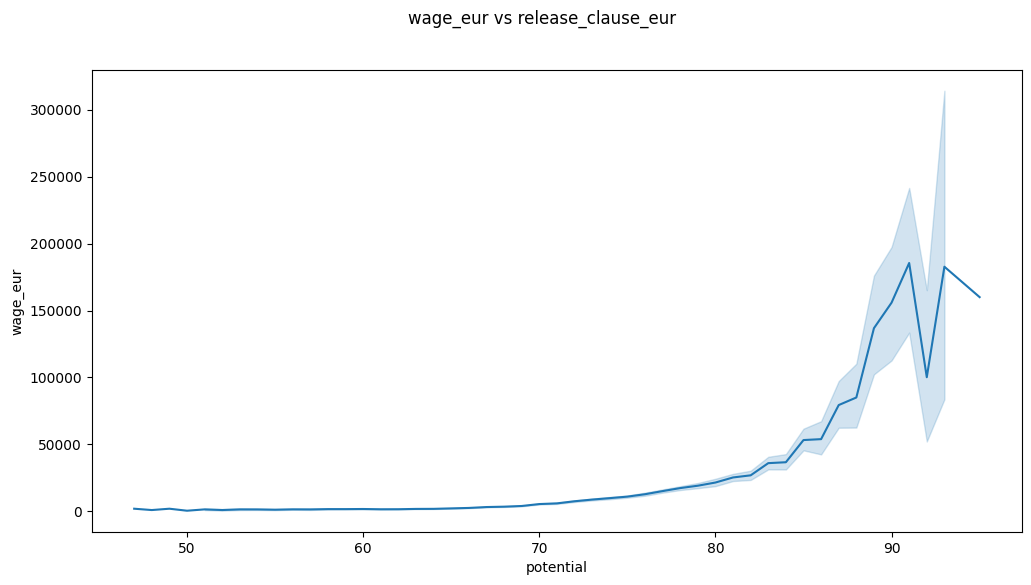

In [133]:
fig, ax1 = plt.subplots(ncols=1, figsize=(12,6))
s = sns.lineplot(ax = ax1, x="potential", y="wage_eur", data=df_21)
plt.suptitle("wage_eur vs release_clause_eur")
plt.show()

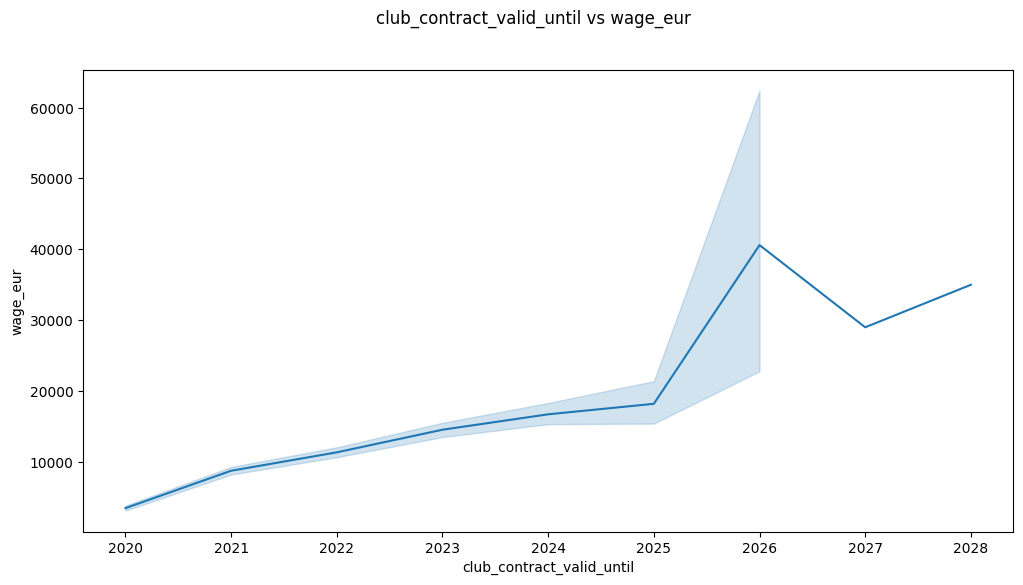

In [134]:
fig, ax1 = plt.subplots(ncols=1, figsize=(12,6))
s = sns.lineplot(ax = ax1, x="club_contract_valid_until", y="wage_eur", data=df_21)
plt.suptitle("club_contract_valid_until vs wage_eur")
plt.show()

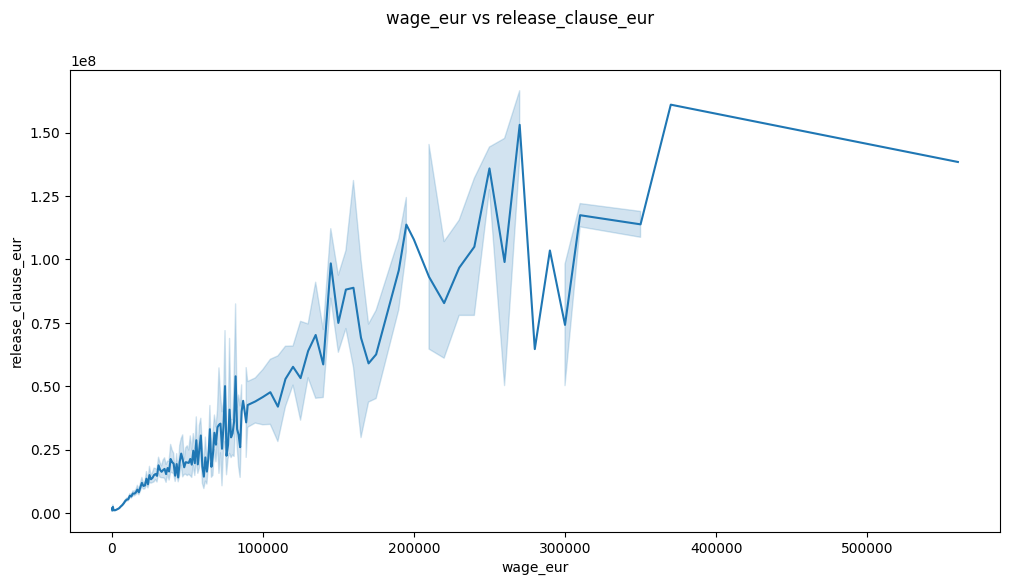

In [135]:
fig, ax1 = plt.subplots(ncols=1, figsize=(12,6))
s = sns.lineplot(ax = ax1, x="wage_eur", y="release_clause_eur", data=df_21)
plt.suptitle("wage_eur vs release_clause_eur")
plt.show()

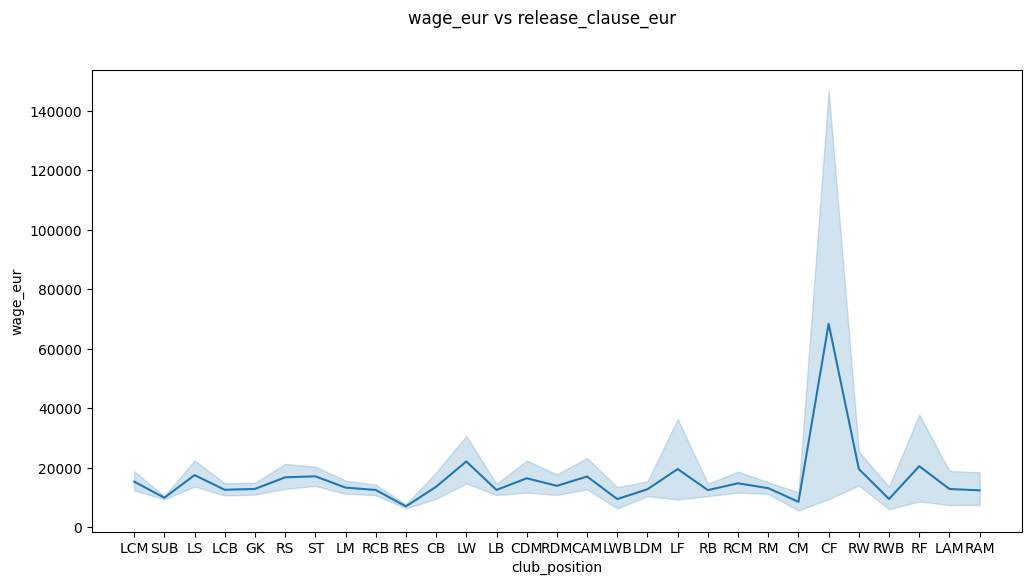

In [136]:
fig, ax1 = plt.subplots(ncols=1, figsize=(12,6))
s = sns.lineplot(ax = ax1, x="club_position", y="wage_eur", data=df_21)
plt.suptitle("wage_eur vs release_clause_eur")
plt.show()

In [137]:
fig = pl.violin(df_21, box=True, x="club_position", y="wage_eur", orientation="v")
fig.update_layout(autosize=False, width=1000, height=800,)
fig.show()

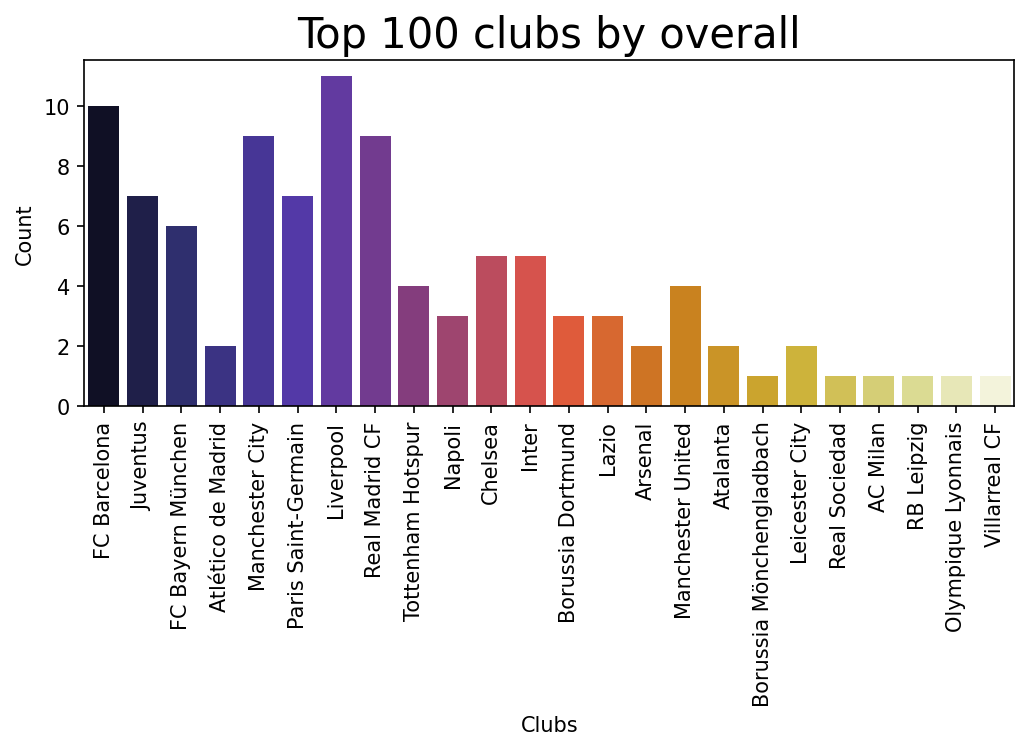

In [138]:
plt.figure(figsize=(8,3),dpi=150)
dftmp = df_21.sort_values(by="overall", ascending=False)
sns.countplot(x='club_name', data=dftmp.head(100),palette='CMRmap')
plt.xticks(rotation=90)
plt.xlabel('Clubs')
plt.ylabel('Count')
plt.title('Top 100 clubs by overall', fontsize=20)
plt.show()

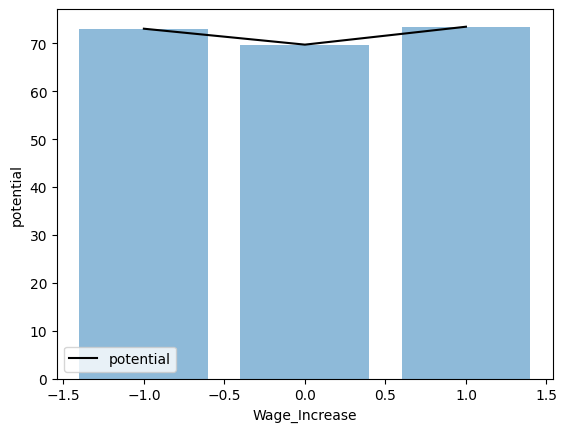

In [139]:
grouped = df_21.groupby(by='Wage_Increase')['potential'].mean()

plt.bar(x=grouped.index, height=grouped.values, alpha=0.5)
grouped.plot.line(color='black')
plt.xlabel('Wage_Increase')
plt.ylabel('potential')
plt.legend()
plt.show()

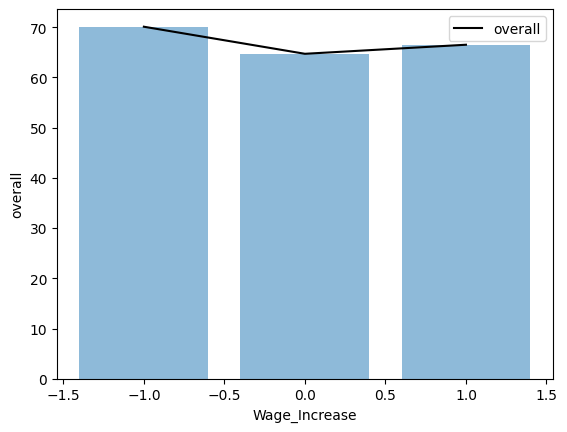

In [140]:
grouped = df_21.groupby(by='Wage_Increase')['overall'].mean()

plt.bar(x=grouped.index, height=grouped.values, alpha=0.5)
grouped.plot.line(color='black')
plt.xlabel('Wage_Increase')
plt.ylabel('overall')
plt.legend()
plt.show()

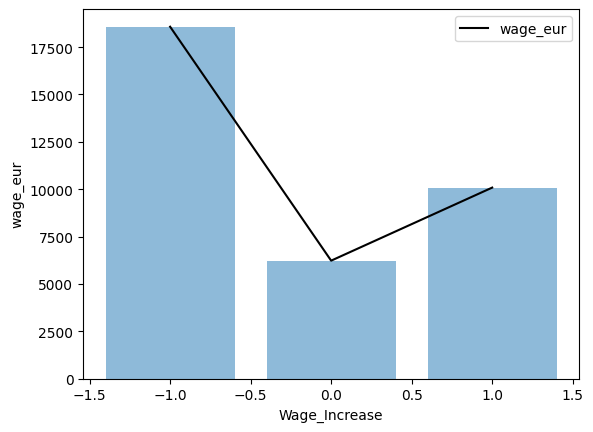

In [141]:
grouped = df_21.groupby(by='Wage_Increase')['wage_eur'].mean()

plt.bar(x=grouped.index, height=grouped.values, alpha=0.5)
grouped.plot.line(color='black')
plt.xlabel('Wage_Increase')
plt.ylabel('wage_eur')
plt.legend()
plt.show()

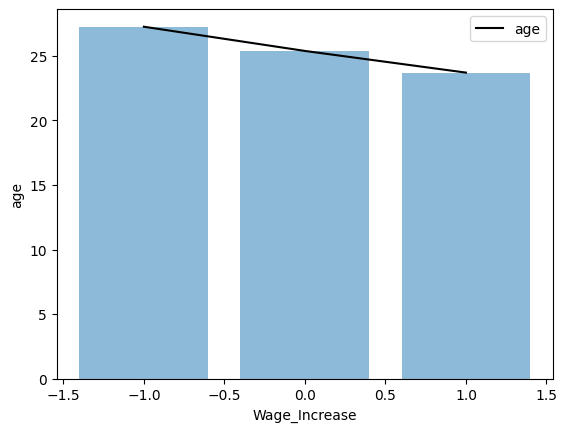

In [142]:
grouped = df_21.groupby(by='Wage_Increase')['age'].mean()

plt.bar(x=grouped.index, height=grouped.values, alpha=0.5)
grouped.plot.line(color='black')
plt.xlabel('Wage_Increase')
plt.ylabel('age')
plt.legend()
plt.show()

In [179]:
plt.figure(figsize=(50,50),dpi=200)
ax = plt.axes()
ax.set_title('Absolute Pearson correlation')
sns.heatmap(np.abs(df_21.corr()), annot=True)
plt.show()

C:\Users\ayush\AppData\Local\Temp\ipykernel_22844\3717692082.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



# Data Cleaning

## 22 dataset

In [143]:
typ_dict= dict(df_21.dtypes)
url_col = list()
for typ in typ_dict:
  if typ_dict[typ] == object and "url" in typ:
    url_col.append(typ)
df_21.drop(url_col, axis=1, inplace=True)

In [144]:
null_df = dict(df_21.isnull().sum())
null_col = list()
for col in null_df:
    if null_df[col] > 9000:
        null_col.append(col)
df_21.drop(null_col, axis=1, inplace=True)

In [145]:
typ_dict= dict(df_21.dtypes)
obj_list = list()
for typ in typ_dict:
  if typ_dict[typ] == object:
    obj_list.append(typ)

In [146]:
for col in obj_list[14:]:
    tmp = df_21[col].tolist()
    tmp_ = [x.split("+") for x in tmp]
    tmp_ = [re.split("[+-]", x)[0] for x in tmp]
    #tmp_ = [[int(y) for y in x] for x in tmp_]
    df_21[col] = tmp_
df_21.drop(obj_list[1:14], axis=1, inplace=True)

In [147]:
l = list(df_21.columns)
l.remove("league_level")
df_21.dropna(axis=0, inplace=True, subset=l)

In [148]:
df_21.dropna(axis=1, how="any", inplace=True)

In [149]:
df_21

sofifa_id       short_name  overall  potential  value_eur  wage_eur  \
272           41          Iniesta       81         81  8000000.0   12000.0   
3805        3467             Yuri       71         71   650000.0    6000.0   
11868      10899        C. Porter       63         63   160000.0    2000.0   
4512       18115  Rúben Fernandes       70         70   525000.0    6000.0   
503        20775         Quaresma       79         79  5500000.0   11000.0   
...          ...              ...      ...        ...        ...       ...   
17805     258947       Y. Alounga       55         70   300000.0    1000.0   
12944     258949   Jofre Carreras       63         79  1200000.0    1000.0   
17806     258952      I. Albaraka       55         60   170000.0    2000.0   
12945     258953      I. Niskanen       63         72  1100000.0    2000.0   
6339      258958      O. Filippov       69         69  1500000.0    8000.0   

       age  height_cm  weight_kg  club_team_id  ...  cdm  rdm  rwb  lb  lcb  \
272     36        171         68      101146.0  ...   73   73   70  67   64   
3805    37        186         78        2023.0  ...   50   50   52  49   47   
11868   36        186         83         121.0  ...   50   50   47  46   49   
4512    34        185         78        1888.0  ...   67   67   64  66   70   
503     36        175         67        1887.0  ...   53   53   55  49   41   
...    ...        ...        ...           ...  ...  ...  ...  ...  ..  ...   
17805   18        184         80         897.0  ...   34   34   37  36   33   
12944   19        180         70         452.0  ...   44   44   49  46   40   
17806   23        185         68      113217.0  ...   54   54   53  53   52   
12945   22        177         78      111239.0  ...   47   47   50  46   41   
6339    27        183         75         680.0  ...   42   42   44  42   38   

       cb  rcb  rb  gk  Wage_Increase  
272    64   64  67  17             -1  
3805   47   47  49  17             -1  
11868  49   49  46  18              0  
4512   70   70  66  18             -1  
503    41   41  49  18             -1  
...    ..  ...  ..  ..            ...  
17805  33   33  36  16              1  
12944  40   40  46  16              1  
17806  52   52  53  15              1  
12945  41   41  46  17              0  
6339   38   38  42  14             -1  

[11223 rows x 86 columns]

## 22 dataset

In [150]:
typ_dict= dict(df_22.dtypes)
url_col = list()
for typ in typ_dict:
  if typ_dict[typ] == object and "url" in typ:
    url_col.append(typ)
df_22.drop(url_col, axis=1, inplace=True)

In [151]:
null_df = dict(df_22.isnull().sum())
null_col = list()
for col in null_df:
    if null_df[col] > 9000:
        null_col.append(col)
df_22.drop(null_col, axis=1, inplace=True)

In [152]:
typ_dict= dict(df_22.dtypes)
obj_list = list()
for typ in typ_dict:
  if typ_dict[typ] == object:
    obj_list.append(typ)

In [154]:
for col in obj_list[14:]:
    tmp = df_22[col].tolist()
    tmp_ = [x.split("+") for x in tmp]
    tmp_ = [re.split("[+-]", x)[0] for x in tmp]
    #tmp_ = [[int(y) for y in x] for x in tmp_]
    df_22[col] = tmp_
df_22.drop(obj_list[1:14], axis=1, inplace=True)

In [155]:
obj_list[1:13]

['long_name',
 'player_positions',
 'dob',
 'club_name',
 'league_name',
 'club_position',
 'club_joined',
 'nationality_name',
 'preferred_foot',
 'work_rate',
 'body_type',
 'real_face']

In [156]:
l = list(df_22.columns)
l.remove("league_level")
df_22.dropna(axis=0, inplace=True, subset=l)

In [157]:
df_22.dropna(axis=1, how="any", inplace=True)

In [158]:
df_22

sofifa_id       short_name  overall  potential  value_eur  wage_eur  \
509           41          Iniesta       79         79  5500000.0   10000.0   
3827        3467             Yuri       71         71   650000.0    5000.0   
13371      10899        C. Porter       62         62   140000.0    2000.0   
5465       18115  Rúben Fernandes       69         69   375000.0    4000.0   
863        20775         Quaresma       77         77  3400000.0   10000.0   
...          ...              ...      ...        ...        ...       ...   
3821      258946        M. Lovato       72         81  4900000.0   20000.0   
16293     258947       Y. Alounga       59         74   550000.0    2000.0   
6374      258949   Jofre Carreras       69         81  3400000.0    7000.0   
12092     258953      I. Niskanen       64         70   925000.0    2000.0   
7429      258958      O. Filippov       68         68  1200000.0    7000.0   

       age  height_cm  weight_kg  club_team_id  ...  ldm  cdm  rdm  rwb  lb  \
509     37        171         68      101146.0  ...   70   70   70   66  63   
3827    38        186         78        2023.0  ...   51   51   51   53  50   
13371   37        186         83         121.0  ...   49   49   49   45  44   
5465    35        187         81        1888.0  ...   67   67   67   64  65   
863     37        175         68        1887.0  ...   52   52   52   53  47   
...    ...        ...        ...           ...  ...  ...  ...  ...  ...  ..   
3821    21        188         78          39.0  ...   67   67   67   65  67   
16293   19        184         80         897.0  ...   51   51   51   51  50   
6374    20        175         70         452.0  ...   50   50   50   54  52   
12092   23        177         78         181.0  ...   48   48   48   52  49   
7429    28        183         75         680.0  ...   41   41   41   44  41   

       lcb  cb  rcb  rb  gk  
509     61  61   61  63  16  
3827    48  48   48  50  15  
13371   49  49   49  44  18  
5465    69  69   69  65  18  
863     40  40   40  47  18  
...    ...  ..  ...  ..  ..  
3821    72  72   72  67  17  
16293   51  51   51  50  17  
6374    46  46   46  52  17  
12092   43  43   43  49  18  
7429    38  38   38  41  14  

[11014 rows x 85 columns]

## Extracting target variable

# Removing unnecessary features

In [159]:
df_21.drop('short_name', axis=1, inplace=True)

In [160]:
df_21.drop('sofifa_id', axis=1, inplace=True)

In [161]:
df_21

overall  potential  value_eur  wage_eur  age  height_cm  weight_kg  \
272         81         81  8000000.0   12000.0   36        171         68   
3805        71         71   650000.0    6000.0   37        186         78   
11868       63         63   160000.0    2000.0   36        186         83   
4512        70         70   525000.0    6000.0   34        185         78   
503         79         79  5500000.0   11000.0   36        175         67   
...        ...        ...        ...       ...  ...        ...        ...   
17805       55         70   300000.0    1000.0   18        184         80   
12944       63         79  1200000.0    1000.0   19        180         70   
17806       55         60   170000.0    2000.0   23        185         68   
12945       63         72  1100000.0    2000.0   22        177         78   
6339        69         69  1500000.0    8000.0   27        183         75   

       club_team_id  league_level  club_jersey_number  ...  cdm  rdm  rwb  lb  \
272        101146.0           1.0                 8.0  ...   73   73   70  67   
3805         2023.0           2.0                10.0  ...   50   50   52  49   
11868         121.0           3.0                 9.0  ...   50   50   47  46   
4512         1888.0           1.0                26.0  ...   67   67   64  66   
503          1887.0           1.0                10.0  ...   53   53   55  49   
...             ...           ...                 ...  ...  ...  ...  ...  ..   
17805         897.0           1.0                22.0  ...   34   34   37  36   
12944         452.0           2.0                29.0  ...   44   44   49  46   
17806      113217.0           1.0                25.0  ...   54   54   53  53   
12945      111239.0           3.0                22.0  ...   47   47   50  46   
6339          680.0           1.0                11.0  ...   42   42   44  42   

       lcb  cb  rcb  rb  gk  Wage_Increase  
272     64  64   64  67  17             -1  
3805    47  47   47  49  17             -1  
11868   49  49   49  46  18              0  
4512    70  70   70  66  18             -1  
503     41  41   41  49  18             -1  
...    ...  ..  ...  ..  ..            ...  
17805   33  33   33  36  16              1  
12944   40  40   40  46  16              1  
17806   52  52   52  53  15              1  
12945   41  41   41  46  17              0  
6339    38  38   38  42  14             -1  

[11223 rows x 84 columns]

## Building classification model 

In [162]:
df = df_21.astype('int')

X = df.drop('Wage_Increase', axis=1)
y = df['Wage_Increase']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [163]:
fwd=["ls","st","rs","lw","lf","cf","rw","rf"]
mid=["lam","cam","ram","lm","lcm","cm","rcm","rm","ldm","cdm","rdm"]
bck=["lwb","rwb","lb","lcb","cb","rcb","rb","gk"]

In [164]:
pca = PCA(n_components=1)
X_train["fwd"] = pca.fit_transform(X_train[fwd])
X_test["fwd"] = pca.transform(X_test[fwd])

X_train["mid"] = pca.fit_transform(X_train[mid])
X_test["mid"] = pca.transform(X_test[mid])

X_train["bck"] = pca.fit_transform(X_train[bck])
X_test["bck"] = pca.transform(X_test[bck])

In [165]:
X_train.drop(labels=fwd+mid+bck, axis=1, inplace=True)
X_test.drop(labels=fwd+mid+bck, axis=1, inplace=True)

In [166]:
lr_model = Lasso(alpha=0.1)
lr_model.fit(X_train, y_train)

print('Training score: {}'.format(lr_model.score(X_train, y_train)))
print('Test score: {}'.format(lr_model.score(X_test, y_test)))

y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

Training score: 0.14106872210741717
Test score: 0.12632926336086658
RMSE: 0.7796964751039587


In [167]:
lr_model.coef_

array([-0.00000000e+00,  0.00000000e+00,  1.90625489e-08, -8.99494285e-06,
       -5.14977350e-02,  0.00000000e+00,  0.00000000e+00, -1.59262747e-07,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -7.98223111e-05,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.90218139e-10,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -1.68666711e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  3.87495454e-04, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -9.58060001e-05, -1.82366150e-03, -1.27169136e-03,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.13791274e-04,  0.00000000e+00,
       -0.00000000e+00,  

In [168]:
rem_feature = list()
for i,j in enumerate(lr_model.coef_):
    if j == 0:
        rem_feature.append(i)
len(rem_feature)

47

In [169]:
X_train.columns[rem_feature]

Index(['overall', 'potential', 'height_cm', 'weight_kg', 'league_level',
       'club_jersey_number', 'club_contract_valid_until', 'weak_foot',
       'skill_moves', 'international_reputation', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_ball_control', 'movement_acceleration',
       'movement_sprint_speed', 'movement_agility', 'movement_reactions',
       'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'fwd', '

In [170]:
rem_feature.remove(X_train.columns.get_loc("mid"))
rem_feature.remove(X_train.columns.get_loc("bck"))

In [171]:
X_train.drop(labels=X_train.columns[rem_feature], inplace=True, axis=1)
X_test.drop(labels=X_test.columns[rem_feature], inplace=True, axis=1)

In [172]:
X_train

value_eur  wage_eur  age  club_team_id  nationality_id  \
11124     775000      8000   26          1879              83   
825     21000000     27000   22        111974              27   
7136     2400000      3000   22        112828              95   
12433     725000      2000   22           149              42   
4171     1800000      6000   30        111138              93   
...          ...       ...  ...           ...             ...   
5978     1400000      7000   28        111059              54   
8995     1200000      4000   24        111117              48   
4294     2600000     15000   24           189              27   
3905     1200000      9000   32          1793              14   
9202     1800000      3000   22        100888              45   

       release_clause_eur  attacking_crossing  skill_long_passing  \
11124              976000                  60                  64   
825              24700000                  72                  77   
7136              2000000                  60                  68   
12433              878000                  55                  54   
4171              3300000                  63                  60   
...                   ...                 ...                 ...   
5978              2100000                  72                  51   
8995              1700000                  60                  57   
4294              5300000                  71                  48   
3905              2900000                  25                  56   
9202              1700000                  49                  66   

       movement_balance  power_shot_power  power_jumping  \
11124                51                58             50   
825                  56                76             57   
7136                 47                68             43   
12433                62                63             60   
4171                 77                69             69   
...                 ...               ...            ...   
5978                 88                59             56   
8995                 85                54             52   
4294                 61                45             67   
3905                 64                40             83   
9202                 53                55             62   

       defending_sliding_tackle        mid        bck  
11124                        36  -0.160317  25.640137  
825                          75 -44.356636 -41.919860  
7136                         62 -20.184206 -14.897764  
12433                        55   0.128364  -0.591131  
4171                         47 -22.848253   1.402271  
...                         ...        ...        ...  
5978                         31  -1.019200  34.697874  
8995                         27   3.364300  34.109058  
4294                         74   1.510887 -32.636140  
3905                         74  28.069549 -19.510878  
9202                         54 -13.604891 -10.399667  

[7856 rows x 14 columns]

In [173]:
sc = StandardScaler()

tr_col = list(X_train.columns)
te_col = list(X_test.columns)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train, columns=tr_col)
X_test= pd.DataFrame(X_test, columns=te_col)

In [174]:
lr_model = RandomForestClassifier()
lr_model.fit(X_train, y_train)

print('Training score: {}'.format(lr_model.score(X_train, y_train)))
print('Test score: {}'.format(lr_model.score(X_test, y_test)))

y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

Training score: 1.0
Test score: 0.5577665577665578
RMSE: 0.9874472011464588


# Model building


## SVM

In [215]:
from sklearn.svm import LinearSVC

In [216]:
svm_clf = LinearSVC()
svm_clf.fit(X_train, y_train)

C:\Users\ayush\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVC()

In [217]:
y_pred = svm_clf.predict(X_test)

In [218]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.51      0.47      0.49       938
           0       0.44      0.21      0.29       931
           1       0.54      0.74      0.62      1498

    accuracy                           0.52      3367
   macro avg       0.50      0.47      0.47      3367
weighted avg       0.50      0.52      0.49      3367



## Adaboost

In [219]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

In [220]:
ada_clf = AdaBoostClassifier(n_estimators=100)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [221]:
y_pred = ada_clf.predict(X_test)

In [222]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.53      0.55      0.54       938
           0       0.50      0.30      0.38       931
           1       0.56      0.69      0.62      1498

    accuracy                           0.54      3367
   macro avg       0.53      0.51      0.51      3367
weighted avg       0.54      0.54      0.53      3367



## MLP

In [223]:
from sklearn.neural_network import MLPClassifier

In [224]:
mlp_clf = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(128,3), max_iter=1000)
mlp_clf.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(128, 3), max_iter=1000)

In [225]:
y_pred = mlp_clf.predict(X_test)

In [226]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.49      0.55      0.52       938
           0       0.43      0.30      0.35       931
           1       0.55      0.62      0.58      1498

    accuracy                           0.51      3367
   macro avg       0.49      0.49      0.48      3367
weighted avg       0.50      0.51      0.50      3367



## RF Classifier

In [227]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

print('Training score: {}'.format(rf_clf.score(X_train, y_train)))
print('Test score: {}'.format(rf_clf.score(X_test, y_test)))

y_pred = rf_clf.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# rmse = math.sqrt(mse)


Training score: 1.0
Test score: 0.5571725571725572


In [228]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.52      0.52      0.52       938
           0       0.54      0.39      0.45       931
           1       0.58      0.68      0.63      1498

    accuracy                           0.56      3367
   macro avg       0.55      0.53      0.53      3367
weighted avg       0.55      0.56      0.55      3367



## Bagging

In [229]:
from sklearn.ensemble import BaggingClassifier

In [230]:
bag_clf = BaggingClassifier()
bag_clf.fit(X_train, y_train)

BaggingClassifier()

In [231]:
y_pred = bag_clf.predict(X_test)

In [232]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.49      0.53      0.51       938
           0       0.48      0.44      0.46       931
           1       0.58      0.58      0.58      1498

    accuracy                           0.53      3367
   macro avg       0.52      0.52      0.52      3367
weighted avg       0.53      0.53      0.53      3367

